# **CIFAR-10 DATASET**

The CIFAR-10 dataset is a widely used benchmark dataset in machine learning and computer vision. It was intended for evaluating the performance of various algorithms on the task of image classification.

The dataset consists of 60,000 32x32 color images.
*   50,000 images in the training set and
*   10,000 images in the test set.

The images in the dataset are low resolution, containing complex scenes with various objects, backgrounds, and lighting conditions, which makes the dataset a challenging benchmark for classification tasks.

### CIFAR-10 Classes

There are 10 classes, with each class containing exactly 6,000 images.
All the classes are mutually exclusive.

List of Classes : *Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck*


# **Importing Libraries**

In [1]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Evaluation
from sklearn.metrics import confusion_matrix

# **Loading Dataset - CIFAR 10**

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('Train Images Shape:      ', x_train.shape)
print('Train Labels Shape:      ', y_train.shape)
print('Test Images Shape:       ', x_test.shape)
print('Test Labels Shape:       ', y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
Train Images Shape:       (50000, 32, 32, 3)
Train Labels Shape:       (50000, 1)
Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


##### **Normalizing**
Normalizing the image data is a important step in image preprocessing, which helps in improving the performance and training stability of the neural network. The pixel values in the CIFAR-10 images range from 0 to 255. By converting these values to the range 0-1, the model training becomes more efficient.

In [3]:
# Normalize the image data to the range 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

##### **Encoding**
One-hot encoding is used to convert categorical labels into a binary matrix representation, which is required for categorical classification tasks in neural networks. Each image is labeled with an integer between 0 and 9, representing the class it belongs to.The to_categorical function is used to transform the integer labels into a binary matrix.

For example, if a label is 3, the one-hot encoded vector will be [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This transformation allows the model to output a probability distribution across all classes, which is essential for multi-class classification, with fairness to all the classes.

In [4]:
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

##### **Plotting Some Samples Images from the Dataset**

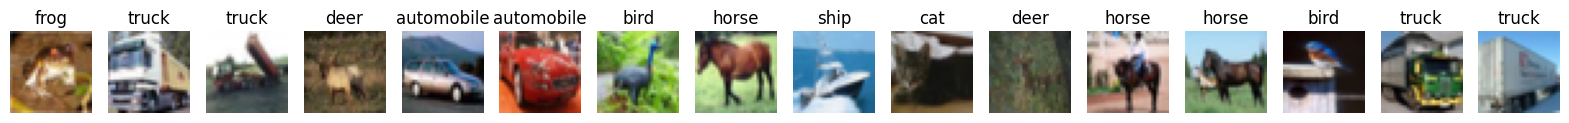

In [5]:
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_images = 16

plt.figure(figsize=(20, 4))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.title(classnames[y_train[i].argmax()])
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

# **Model Development**

The Convolutional Neural Network (CNN) architecture effectively learns and discriminates features from these images to classify them into their respective categories.

**Design Considerations**

1. **Input images** are 32x32 pixels with RGB channels (3 channels).
2. **1st Convolutional Layer** captures basic patterns like edges and color contrasts.
3. **Batch Normalization** is applied after each convolutional layer to standardize and normalize the activations, which helps stabilize training.
4. **Max Pooling** is applied after convolutional layers, which downsamples the spatial dimensions of the feature maps, reducing computational complexity and controlling overfitting by focusing on the most prominent features.
5. **ReLU activation** is chosen for its simplicity and effectiveness in introducing non-linearity.
6. **L2 Regularization** is used with a small coefficient to penalize large weights, preventing the model from fitting noise in training data.
7. **Dropout** is implemented after each pooling layer to randomly deactivate a fraction of neurons, preventing them from co-adapting too much,  enhancing training stability and thus improving the generalization capability of the network.
8. **Filters increases** as the network progresses, to capture more features. This hierarchical feature extraction is essential for learning high-level representations.
9. **Flatten Layers** in the end converts the 2D feature maps into a 1D vector to feed into fully connected layers. These layers facilitates learning of complex combinations of high-level features extracted by previous convolutional layers.
10. **Output Layer** is a dense layer with 10 units (number of classes in CIFAR-10) and softmax activation, which outputs a probability distribution over the classes.

Each component of the architecture has been carefully chosen and sequenced to maximize feature extraction, reduce overfitting, and enhance classification accuracy. By progressively increasing the depth and complexity of the model, starting from basic features to more abstract representations, it aims to achieve performance on the CIFAR-10 dataset.

In [11]:
# Define the CNN model
model = tf.keras.models.Sequential()

input_shape=x_train.shape[1:] # input shape (32, 32, 3)
regularization_param = 0.0001
kernel_size = (3,3)

# First Convolutional Layer: With 32 filters, 3x3 kernel size, ReLU activation.
model.add(Conv2D(32,
                 kernel_size,
                 activation='relu',
                 padding='same',
                 input_shape=input_shape,
                 kernel_regularizer=l2(regularization_param)))
model.add(BatchNormalization())  # Adding batch normalization for better training

model.add(Conv2D(32,
                 kernel_size,
                 activation='relu',
                 padding='same',
                 input_shape=input_shape,
                 kernel_regularizer=l2(regularization_param)))
model.add(BatchNormalization())  # Adding batch normalization for better training

model.add(MaxPooling2D((2, 2)))  # Max pooling layer with 2x2 pool size
model.add(Dropout(0.25))          # Dropout layer to prevent overfitting

# Second Convolutional layer, with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(64,
                 kernel_size,
                 activation='relu',
                 padding='same',
                 kernel_regularizer=l2(regularization_param)))
model.add(BatchNormalization())  # Adding batch normalization for better training
model.add(MaxPooling2D((2, 2)))  # Max pooling layer with 2x2 pool size
model.add(Dropout(0.30))          # Dropout layer to prevent overfitting

# Third Convolutional Layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(128,
                 kernel_size,
                 activation='relu',
                 padding='same',
                 kernel_regularizer=l2(regularization_param)))
model.add(BatchNormalization())  # Adding batch normalization
model.add(MaxPooling2D((2, 2)))  # Max pooling layer with 2x2 pool size
model.add(Dropout(0.35))         # Dropout layer to prevent overfitting

# Fourth Convolutional Layer with 256 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(256,
                 kernel_size,
                 activation='relu',
                 padding='same',
                 kernel_regularizer=l2(regularization_param)))
model.add(BatchNormalization())  # Adding batch normalization

model.add(Conv2D(256,
                 kernel_size,
                 activation='relu',
                 padding='same',
                 kernel_regularizer=l2(regularization_param)))
model.add(BatchNormalization())  # Adding batch normalization

model.add(MaxPooling2D((2, 2)))  # Max pooling layer
model.add(Dropout(0.4))         # Dropout layer

# Fifth Convolutional Layer with 512 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(512,
                 kernel_size,
                 activation='relu',
                 padding='same',
                 kernel_regularizer=l2(regularization_param)))
model.add(BatchNormalization())  # Adding batch normalization
model.add(MaxPooling2D((2, 2)))  # Max pooling layer
model.add(Dropout(0.45))         # Dropout layer

# Flatten layer to convert 2D feature maps to 1D feature vectors
model.add(Flatten())
# Fully connected (dense) layer
model.add(Dense(512,
                activation='relu',
                kernel_regularizer=l2(regularization_param)))
model.add(BatchNormalization())  # Adding batch normalization
model.add(Dropout(0.5))          # Dropout layer

# Output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# **Compiling Model**

*   Adam optimizer is chosen as it is well-suited for training deep neural networks.

*   categorical_crossentropy loss function is appropriate for multi-class classification tasks where each example belongs to a single class.

*   This metric will be used to monitor the model's performance during training and evaluation, providing the accuracy of predictions compared to the true labels.

In [12]:
# Compile the model with Adam optimizer, categorical cross-entropy loss, and accuracy metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

The Callback is used to implement early stopping during the training. It monitors both the validation accuracy and training accuracy. Training is stopped if both accuracies cross a predefined threshold of 90%.

This helps prevent overfitting, saves computational resources, provides real-time feedback on model performance, and ensures the model generalizes well to unseen data.

In [14]:
# Callback function to avoid overfitting
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        name_epoch = 'Epoch_' + str(epoch) + '_Version.keras'
        #print("\nSaving the Model for epoch "+str(epoch) + " as "+ name_epoch)
        model.save(name_epoch)

        if((logs.get('accuracy')>=0.90) and (logs.get('val_accuracy')>=0.85)):
            print("\nAccuracies are High - Stopping Training!")
            self.model.stop_training = True

In [10]:
# Batch_size?
for i in [32,64,128,256]:
    history = model.fit(x_train, y_train, batch_size=i, epochs=1, validation_data=(x_test, y_test), verbose=2)

1563/1563 - 75s - loss: 1.9000 - accuracy: 0.4054 - val_loss: 1.5531 - val_accuracy: 0.5349 - 75s/epoch - 48ms/step
782/782 - 54s - loss: 1.2895 - accuracy: 0.6113 - val_loss: 1.1635 - val_accuracy: 0.6517 - 54s/epoch - 69ms/step
391/391 - 43s - loss: 1.0804 - accuracy: 0.6887 - val_loss: 1.0477 - val_accuracy: 0.6980 - 43s/epoch - 109ms/step
196/196 - 41s - loss: 0.9615 - accuracy: 0.7295 - val_loss: 0.9786 - val_accuracy: 0.7273 - 41s/epoch - 211ms/step


# **Training Model**

*   The model.fit() function initiates the training process of the neural network model. During training, the model learns to minimize the defined loss function  by adjusting its weights based on the optimizer Adam.
  
*   After each epoch, the model's performance on the validation data is evaluated to assess generalization and detect overfitting.
  
*   Verbose mode 2 ensures that detailed updates on training and validation metrics are printed to the console, allowing you to monitor the progress of the training process in real-time.

In [15]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[myCallback()],
                    verbose=1)

Epoch 1/50
391/391 [==============================] - 48s 116ms/step - loss: 2.0996 - accuracy: 0.3606 - val_loss: 4.0683 - val_accuracy: 0.1479
Epoch 2/50
391/391 [==============================] - 45s 115ms/step - loss: 1.4254 - accuracy: 0.5501 - val_loss: 1.2920 - val_accuracy: 0.5994
Epoch 3/50
391/391 [==============================] - 45s 115ms/step - loss: 1.1885 - accuracy: 0.6425 - val_loss: 1.0862 - val_accuracy: 0.6849
Epoch 4/50
391/391 [==============================] - 44s 113ms/step - loss: 1.0644 - accuracy: 0.6916 - val_loss: 1.1038 - val_accuracy: 0.6891
Epoch 5/50
391/391 [==============================] - 44s 113ms/step - loss: 0.9843 - accuracy: 0.7228 - val_loss: 0.9651 - val_accuracy: 0.7357
Epoch 6/50
391/391 [==============================] - 44s 112ms/step - loss: 0.9224 - accuracy: 0.7497 - val_loss: 0.8693 - val_accuracy: 0.7715
Epoch 7/50
391/391 [==============================] - 43s 111ms/step - loss: 0.8840 - accuracy: 0.7674 - val_loss: 0.9610 - val_ac

# **Plotting Training & Validation Accuracies & Loss**

[]

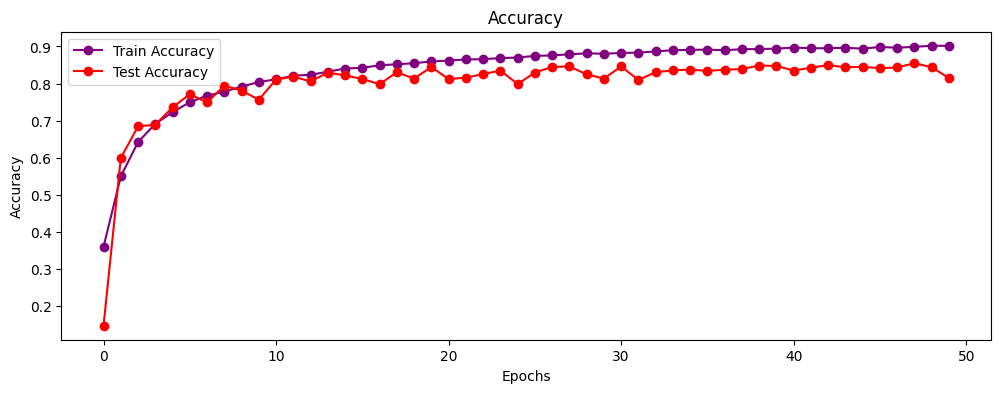

In [22]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], color='purple', label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], color='red', label='Test Accuracy', marker='o')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

[]

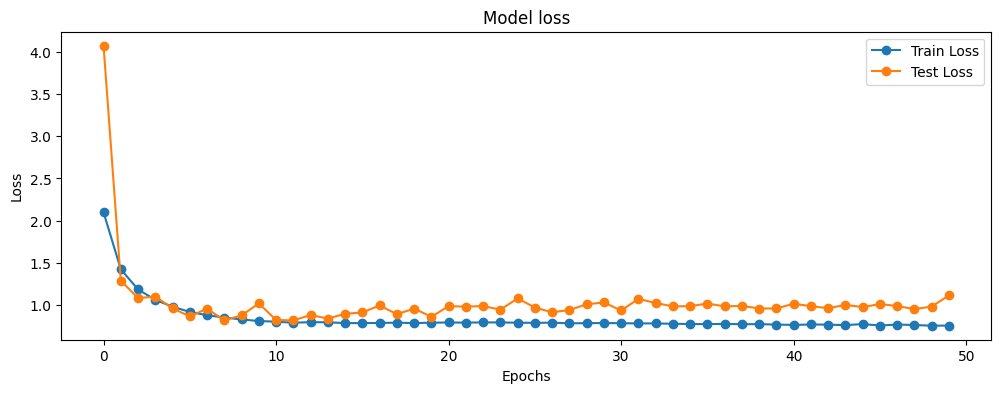

In [24]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Test Loss', marker='o')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.plot()

# **Confusion Matrix**

313/313 [==============================] - 4s 13ms/step


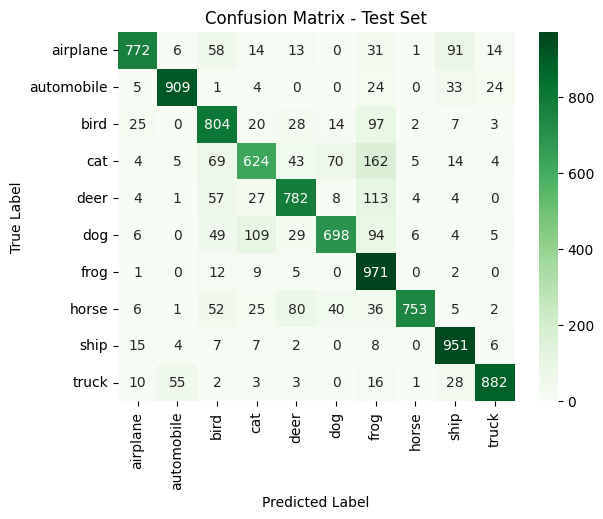

In [25]:
y_pred = model.predict(x_test) # Assuming y_pred contains the predicted probabilities for each class
y_pred_classes = np.argmax(y_pred, axis=1) # Convert predicted probabilities to class labels
y_true = np.argmax(y_test, axis=1) # Convert true labels from one-hot encoded format to class labels

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=classnames, yticklabels=classnames)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Loading the Model with Epochs=49**

In [27]:
selected_model = tf.keras.models.load_model('Epoch_49_Version.keras')
# /content/Epoch_0_Version.keras

# **Sample Predictions from Test Set**

1/1 [==============================] - 0s 31ms/step


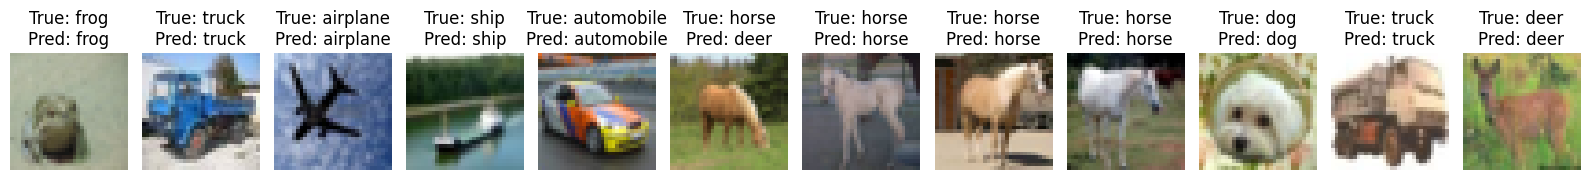

In [35]:
samples=12
indices = np.random.choice(range(len(x_test)), samples)
x, y = x_test[indices], y_test[indices]
y_pred = selected_model.predict(x)
y_true_classes = np.argmax(y, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(16, 3))
for i in range(samples):
        plt.subplot(1, 12, i+1)
        plt.imshow(x[i])
        plt.title(f"True: {classnames[y_true_classes[i]]}\nPred: {classnames[y_pred_classes[i]]}")
        plt.axis('off')
plt.tight_layout()
plt.show()